<a href="https://colab.research.google.com/github/Bayaniblues/Spacex-QR-Codes/blob/master/spacex_QR_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making colorful SpaceX QR codes

To get used to the layout of Jupyter notebook, I created colorful QR codes of spaceX missions that actually link to their youtube launch video.

[QR code](https://github.com/sylnsfar/qrcode) is a fantastic QR code generator that also does color and animations.

[SpaceX api](https://github.com/r-spacex/SpaceX-API) is an open source REST API to get launch data from spaceX.

First lets install myqr

In [0]:
!pip install myqr
# https://github.com/sylnsfar/qrcode

  Created wheel for myqr: filename=MyQR-2.3.1-cp36-none-any.whl size=16669 sha256=95013f1d10a50c169035c197b665965a72169cca3434a3288a1ecdfe9c9489f3
  Stored in directory: /root/.cache/pip/wheels/f2/34/a5/bcee822e19e5cc5adaac1f11c7c4c266d2ac762e61440b0b62
Successfully built myqr


MyQR has several perimeters, the most important ones are (words) to link up the QR code, and (picture) to give the QR code an image. Then we save the processed QR code with the (save_name) perimeter.

In [0]:
from MyQR import myqr
def runqr(savedpatch, video_url, flight_numb):
  if not os.path.exists("/content/qr/"):
          os.makedirs("/content/qr/")
  words = video_url
  version, level, qr_name = myqr.run(
      words,
      version=1,
      level='H',
      picture=savedpatch,
      colorized=True,
      contrast=1.0,
      brightness=1.0,
      save_name= "/content/qr/0" + flight_numb + "_" + "qr" + ".png"
    )

Next lets create the getspacex() function, to organize the spacex data. First steps is to call the spaceX API.

```
r = requests.get('https://api.spacexdata.com/v2/launches/all')
  missions = range(len(r.json()))
```

Then create a for loop to collect all the endpoints



```
  for flight in missions:
    # Save endpoints for Patch image
    patch = r.json()[flight]['links']['mission_patch']
    # Save endpoint for video link
    video = r.json()[flight]['links']['video_link']
```
we have alot of data already, but some planned launches don't have patches or videos so we are going to have to skip those.





In [0]:
import requests
from google.colab import files
import urllib.request
import os
def getspacex():
  # Simple get request to spaceX
  r = requests.get('https://api.spacexdata.com/v2/launches/all')
  missions = range(len(r.json()))
  # search for all flights
  for flight in missions:
    # Save endpoints for Patch image
    patch = r.json()[flight]['links']['mission_patch']
    # Save endpoint for video link
    video = r.json()[flight]['links']['video_link']
    # Stringify integers into string when saving files
    flight_num = str(flight)
    # Some flights don't have patches so make sure to skip those
    if patch and video is not None:
      patch_name = "/content/patches/0" + flight_num + "-" + "flight" + ".png"
      print(patch, video)
      if not os.path.exists("/content/patches/"):
          os.makedirs("/content/patches/")
      urllib.request.urlretrieve(patch, patch_name)
      print(patch_name)
      # Give all data to the higher-order function runqr() then repeat
      runqr(patch_name, video, flight_num)
    else:
      pass
getspacex()

https://images2.imgbox.com/40/e3/GypSkayF_o.png https://www.youtube.com/watch?v=0a_00nJ_Y88
/content/patches/00-flight.png
line 16: mode: byte
https://images2.imgbox.com/be/e7/iNqsqVYM_o.png https://www.youtube.com/watch?v=Lk4zQ2wP-Nc
/content/patches/01-flight.png
line 16: mode: byte
https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png https://www.youtube.com/watch?v=v0w9p3U8860
/content/patches/02-flight.png
line 16: mode: byte
https://images2.imgbox.com/e0/a7/FNjvKlXW_o.png https://www.youtube.com/watch?v=dLQ2tZEH6G0
/content/patches/03-flight.png
line 16: mode: byte
https://images2.imgbox.com/8d/fc/0qdZMWWx_o.png https://www.youtube.com/watch?v=yTaIDooc8Og
/content/patches/04-flight.png
line 16: mode: byte
https://images2.imgbox.com/d6/12/yxne8mMD_o.png https://www.youtube.com/watch?v=nxSxgBKlYws
/content/patches/05-flight.png
line 16: mode: byte
https://images2.imgbox.com/00/2f/FhtEd0nB_o.png https://www.youtube.com/watch?v=cdLITgWKe_0
/content/patches/06-flight.png
line 16: mode: byte

After our get request we now how about 90 spaceX patches converted into QR codes. And they look awesome!

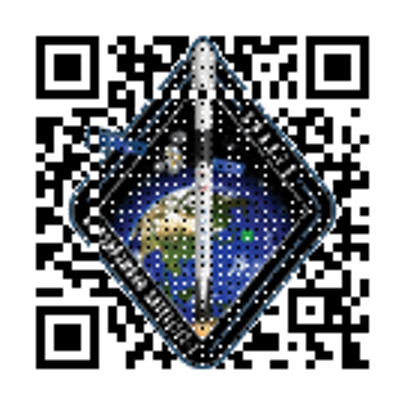

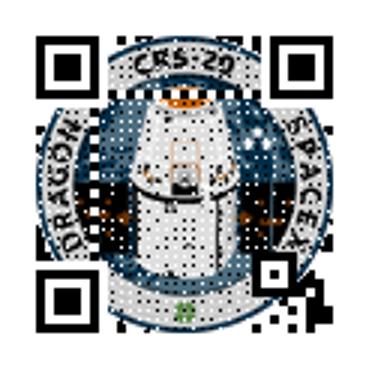

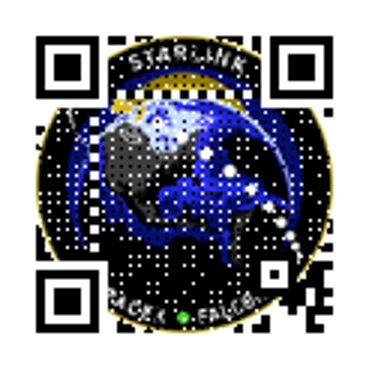

In [0]:
from IPython.display import Image, display
display(Image('./qr/060_qr.png'))
display(Image('./qr/090_qr.png'))
display(Image('./qr/091_qr.png'))
